In [ ]:
%pip install ultralytics
%pip uninstall torch torchvision torchaudio
%pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117
%nvcc --version



In [ ]:
import ultralytics
ultralytics.checks()

In [2]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
%pip install roboflow


In [ ]:

from roboflow import Roboflow
rf = Roboflow(api_key="GESsYUk97JmiZEw0QSnx")
project = rf.workspace("basketball-7pvr7").project("ayoub-yjylu")
version = project.version(2)
dataset = version.download("yolov11")
                

In [ ]:
dataset.location

In [ ]:
from ultralytics import YOLO

# Load a model (YOLOv8n.pt or your custom model)
model = YOLO("yolo11n.pt")

# Train the model
model.train(data=r"C:\Users\MSI\YoloTrain\Ayoub-2\data.yaml", epochs=20, imgsz=640, device='cpu')



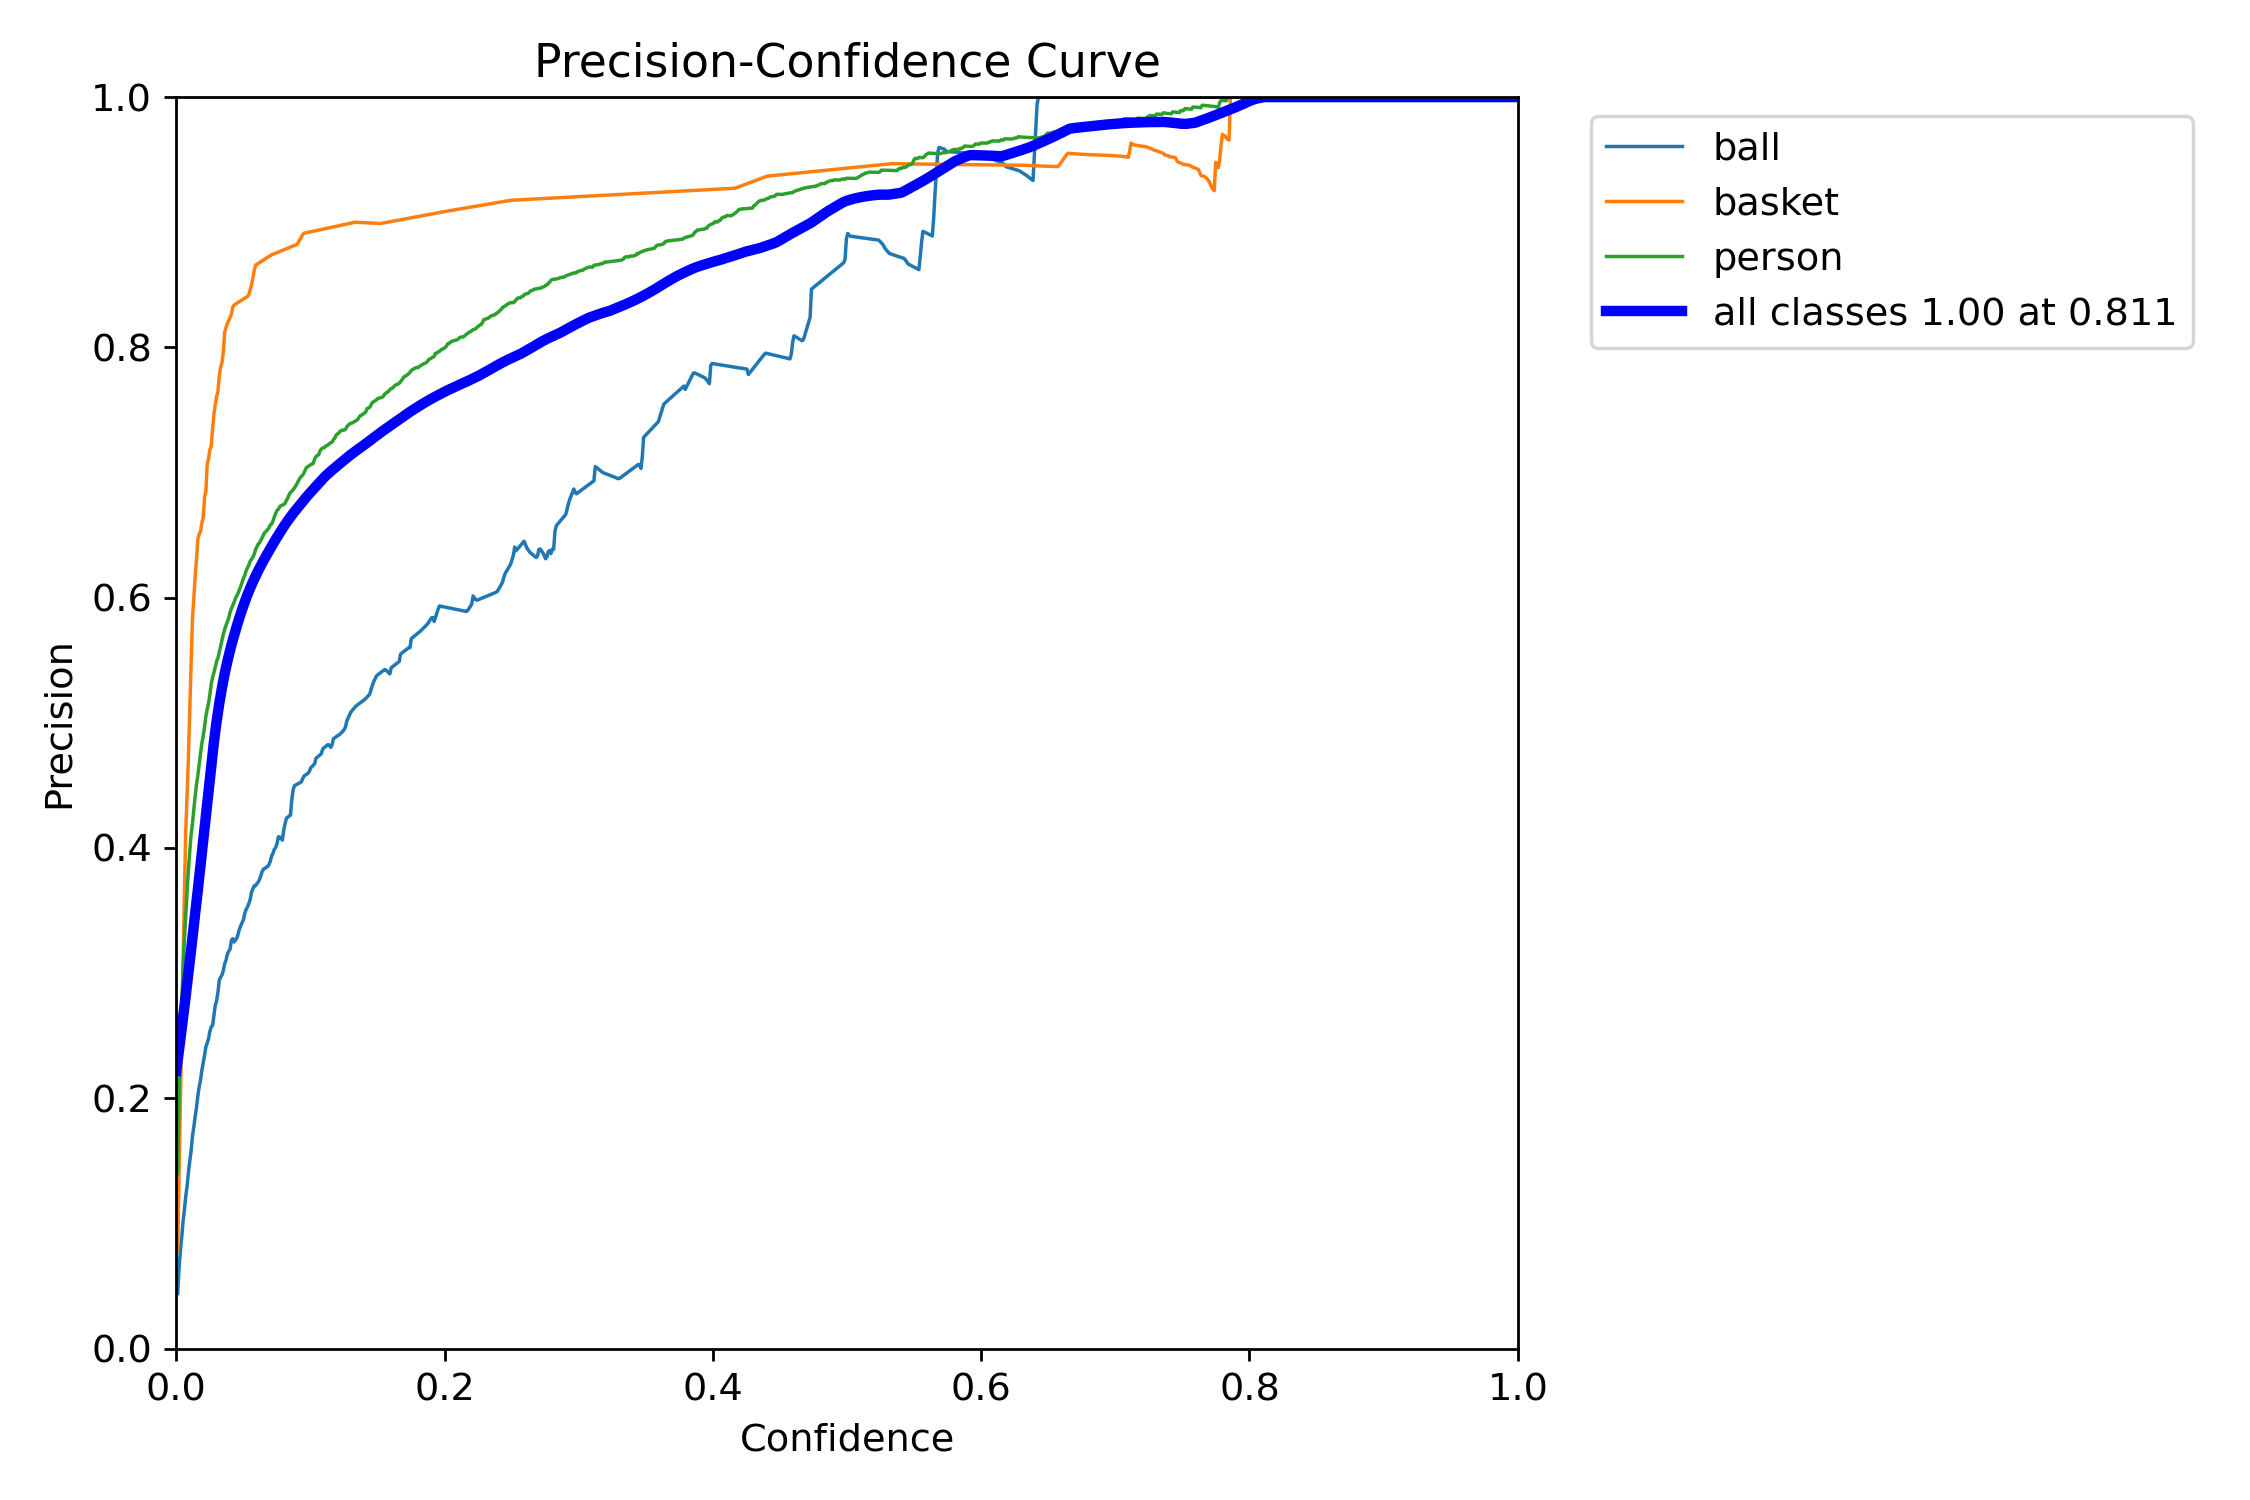

In [1]:
from IPython.display import Image
Image("runs/detect/train7/P_curve.png", width=600)

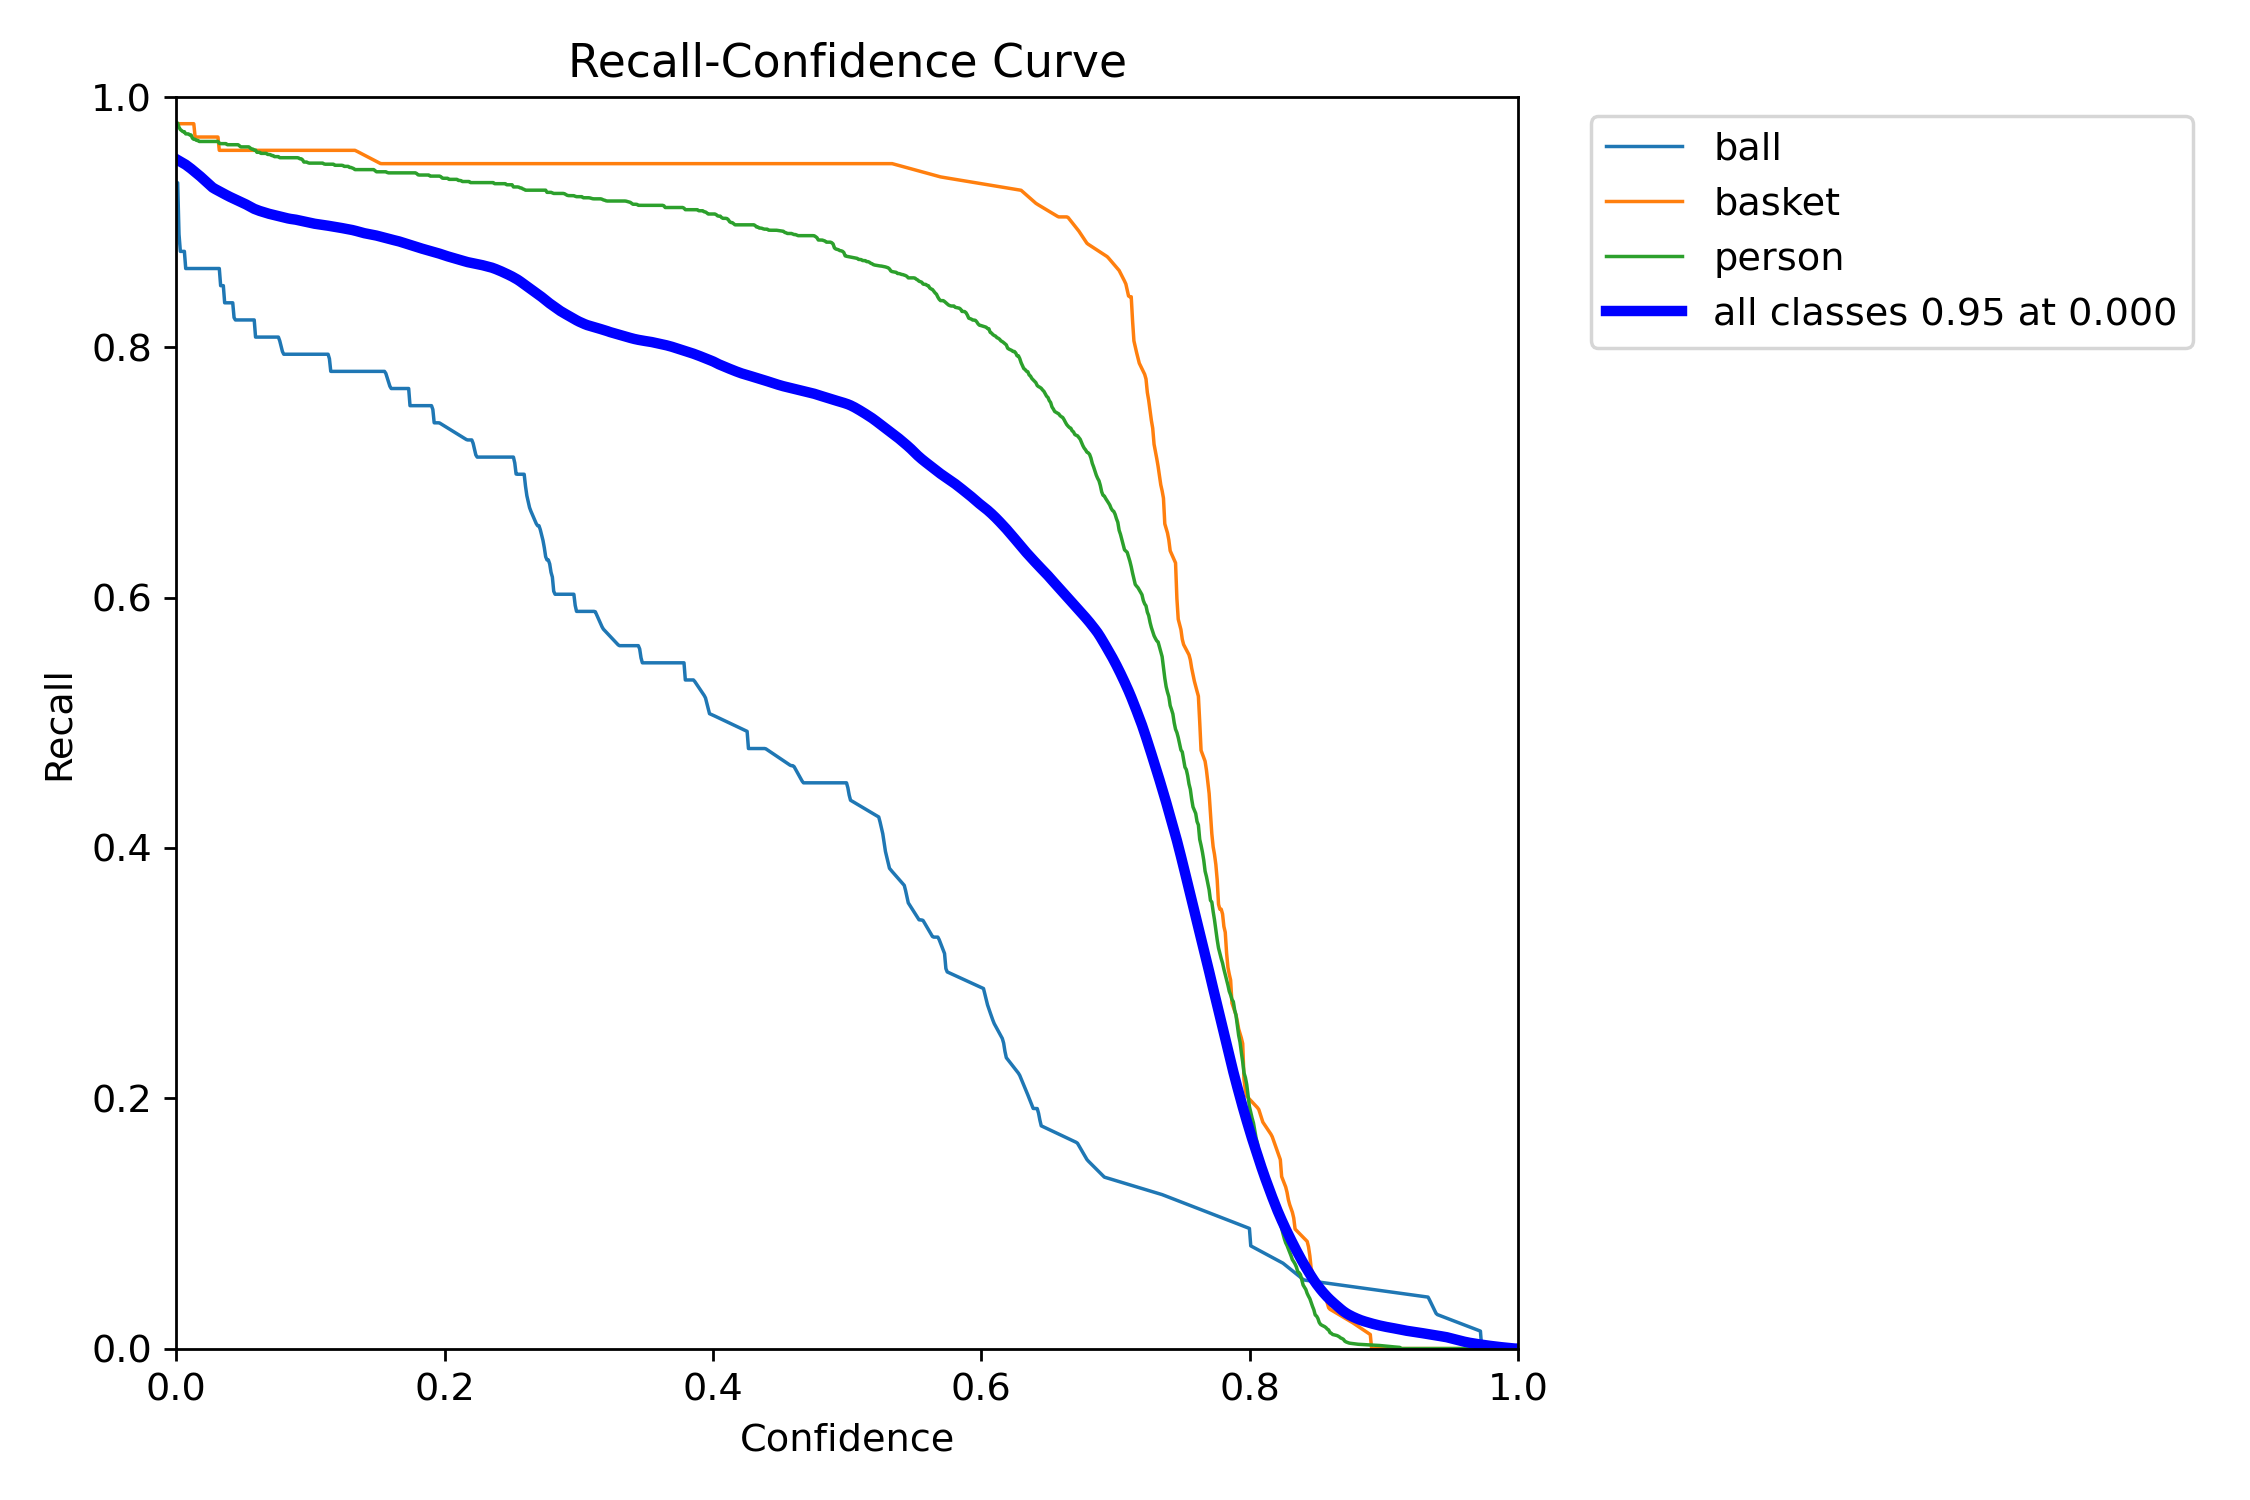

In [2]:
Image("runs/detect/train7/R_curve.png", width=600)

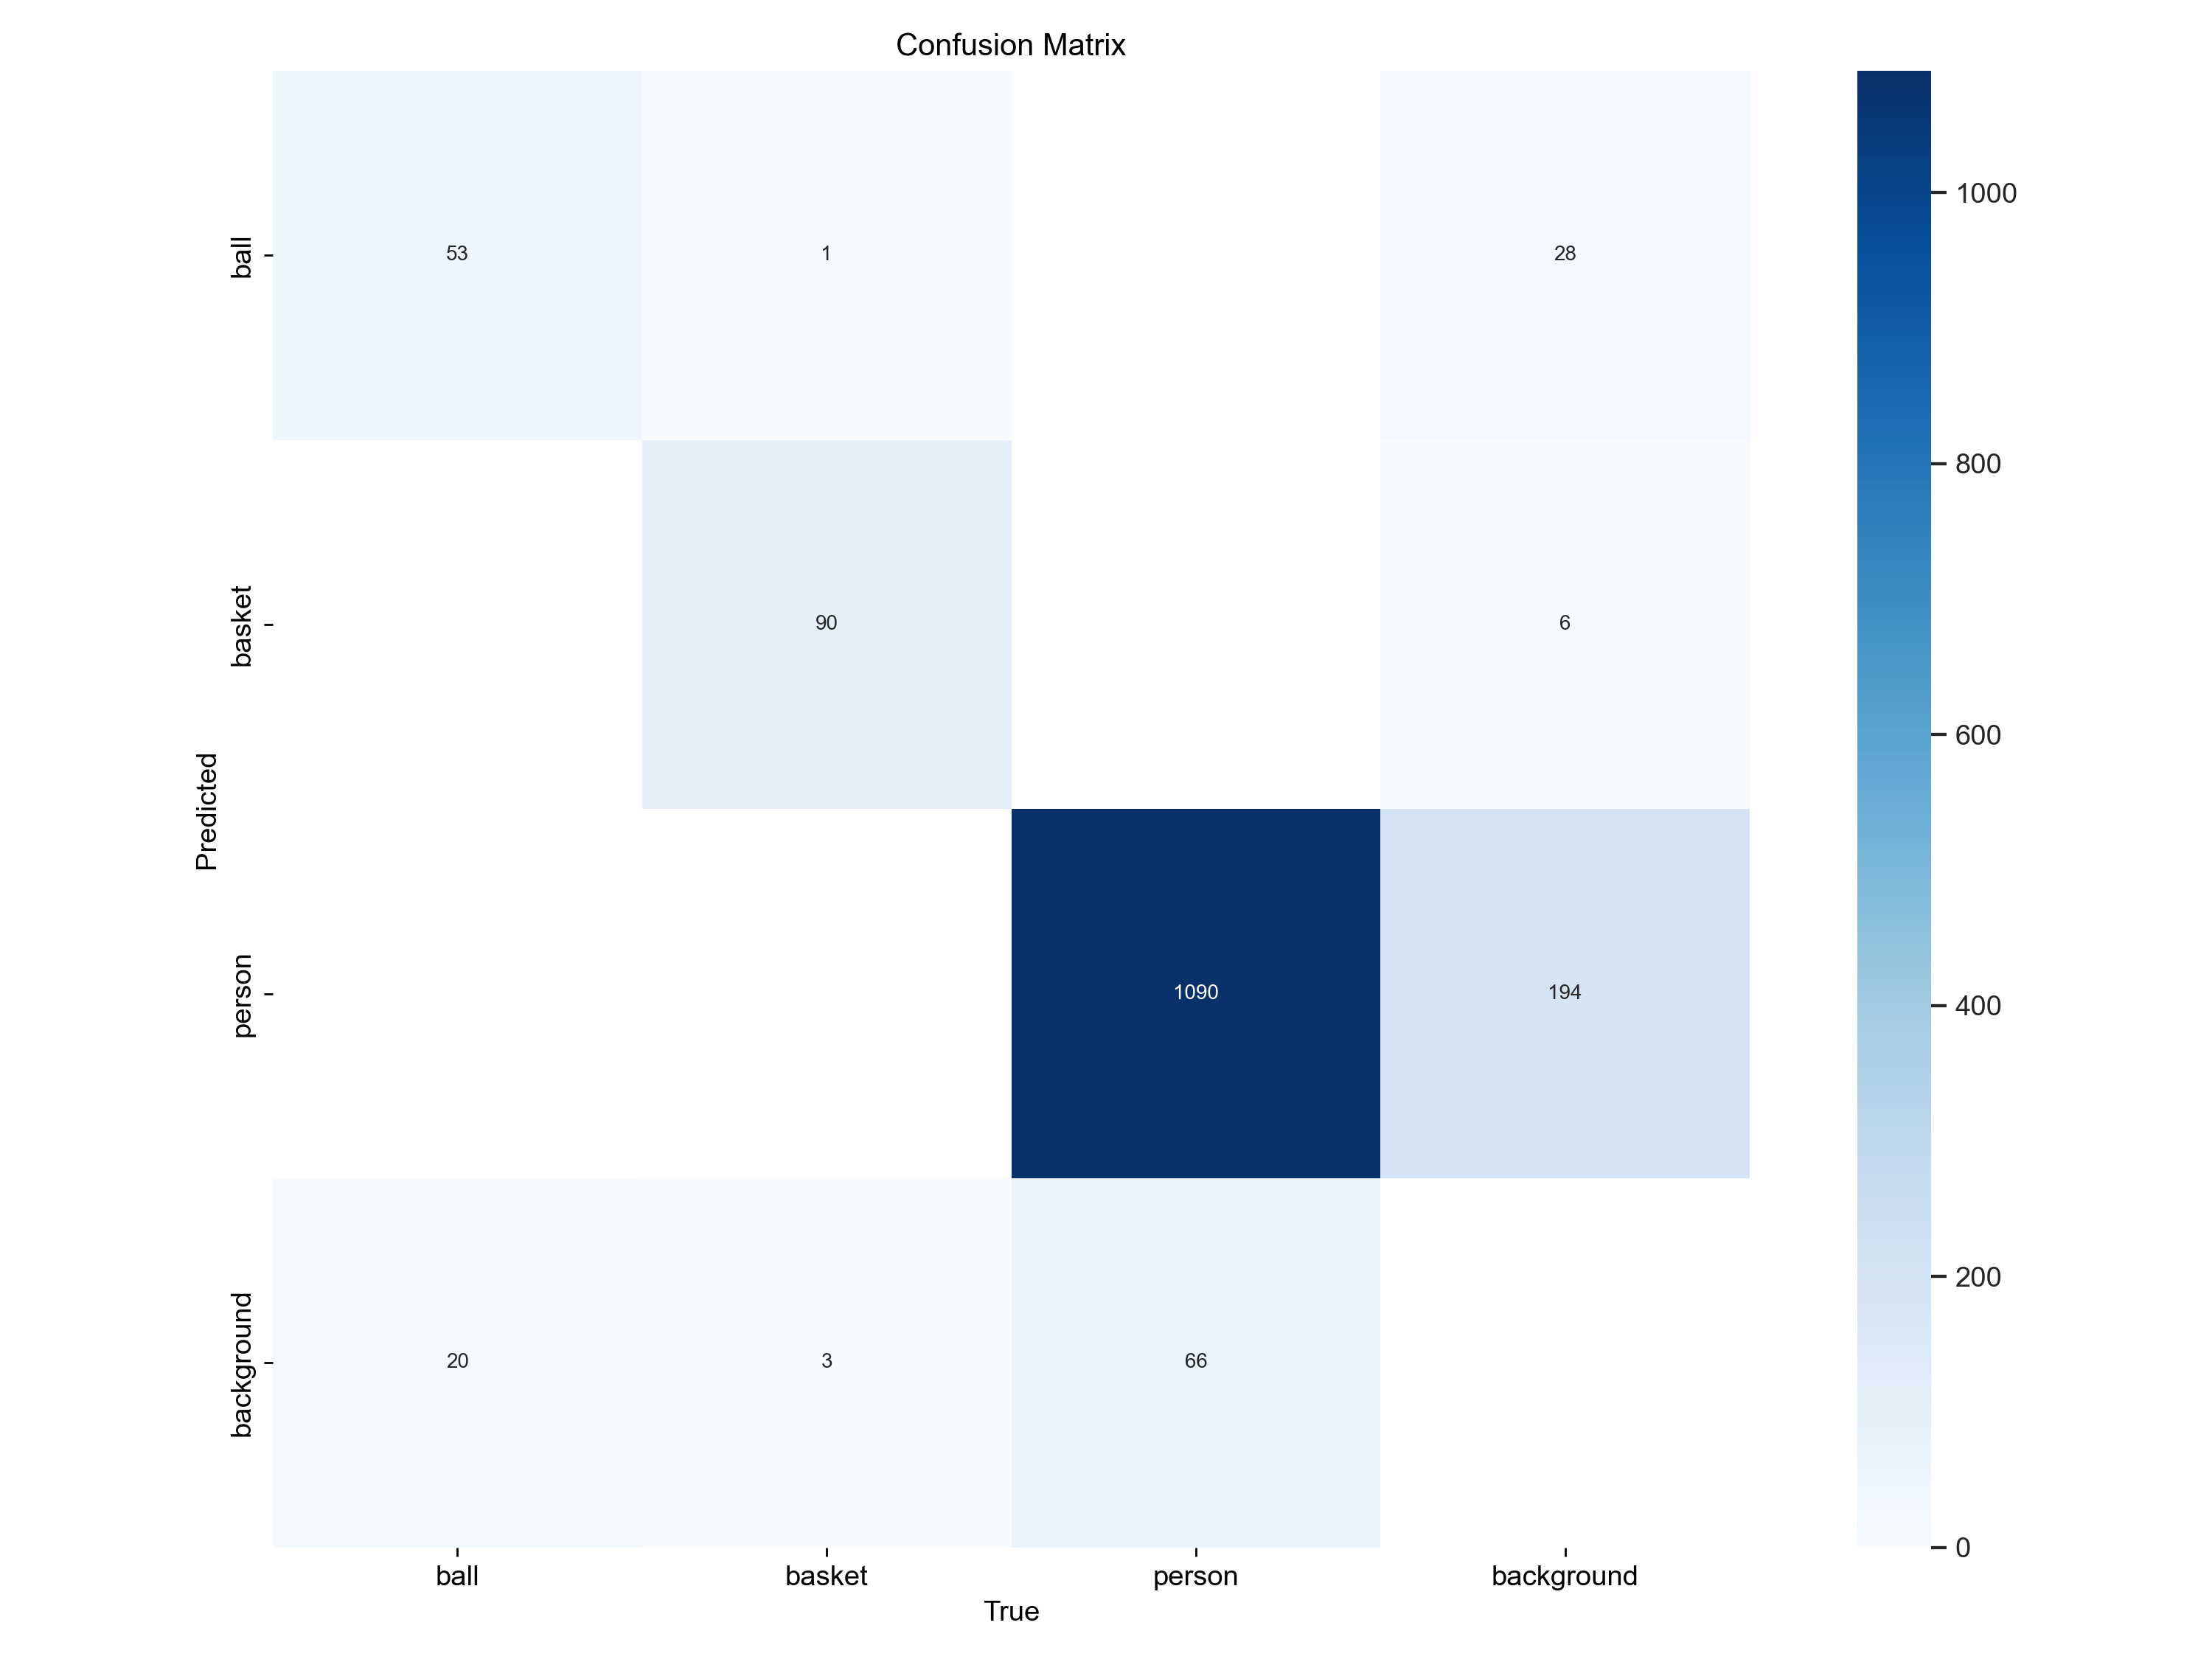

In [3]:
Image("runs/detect/train7/confusion_matrix.png", width=600)

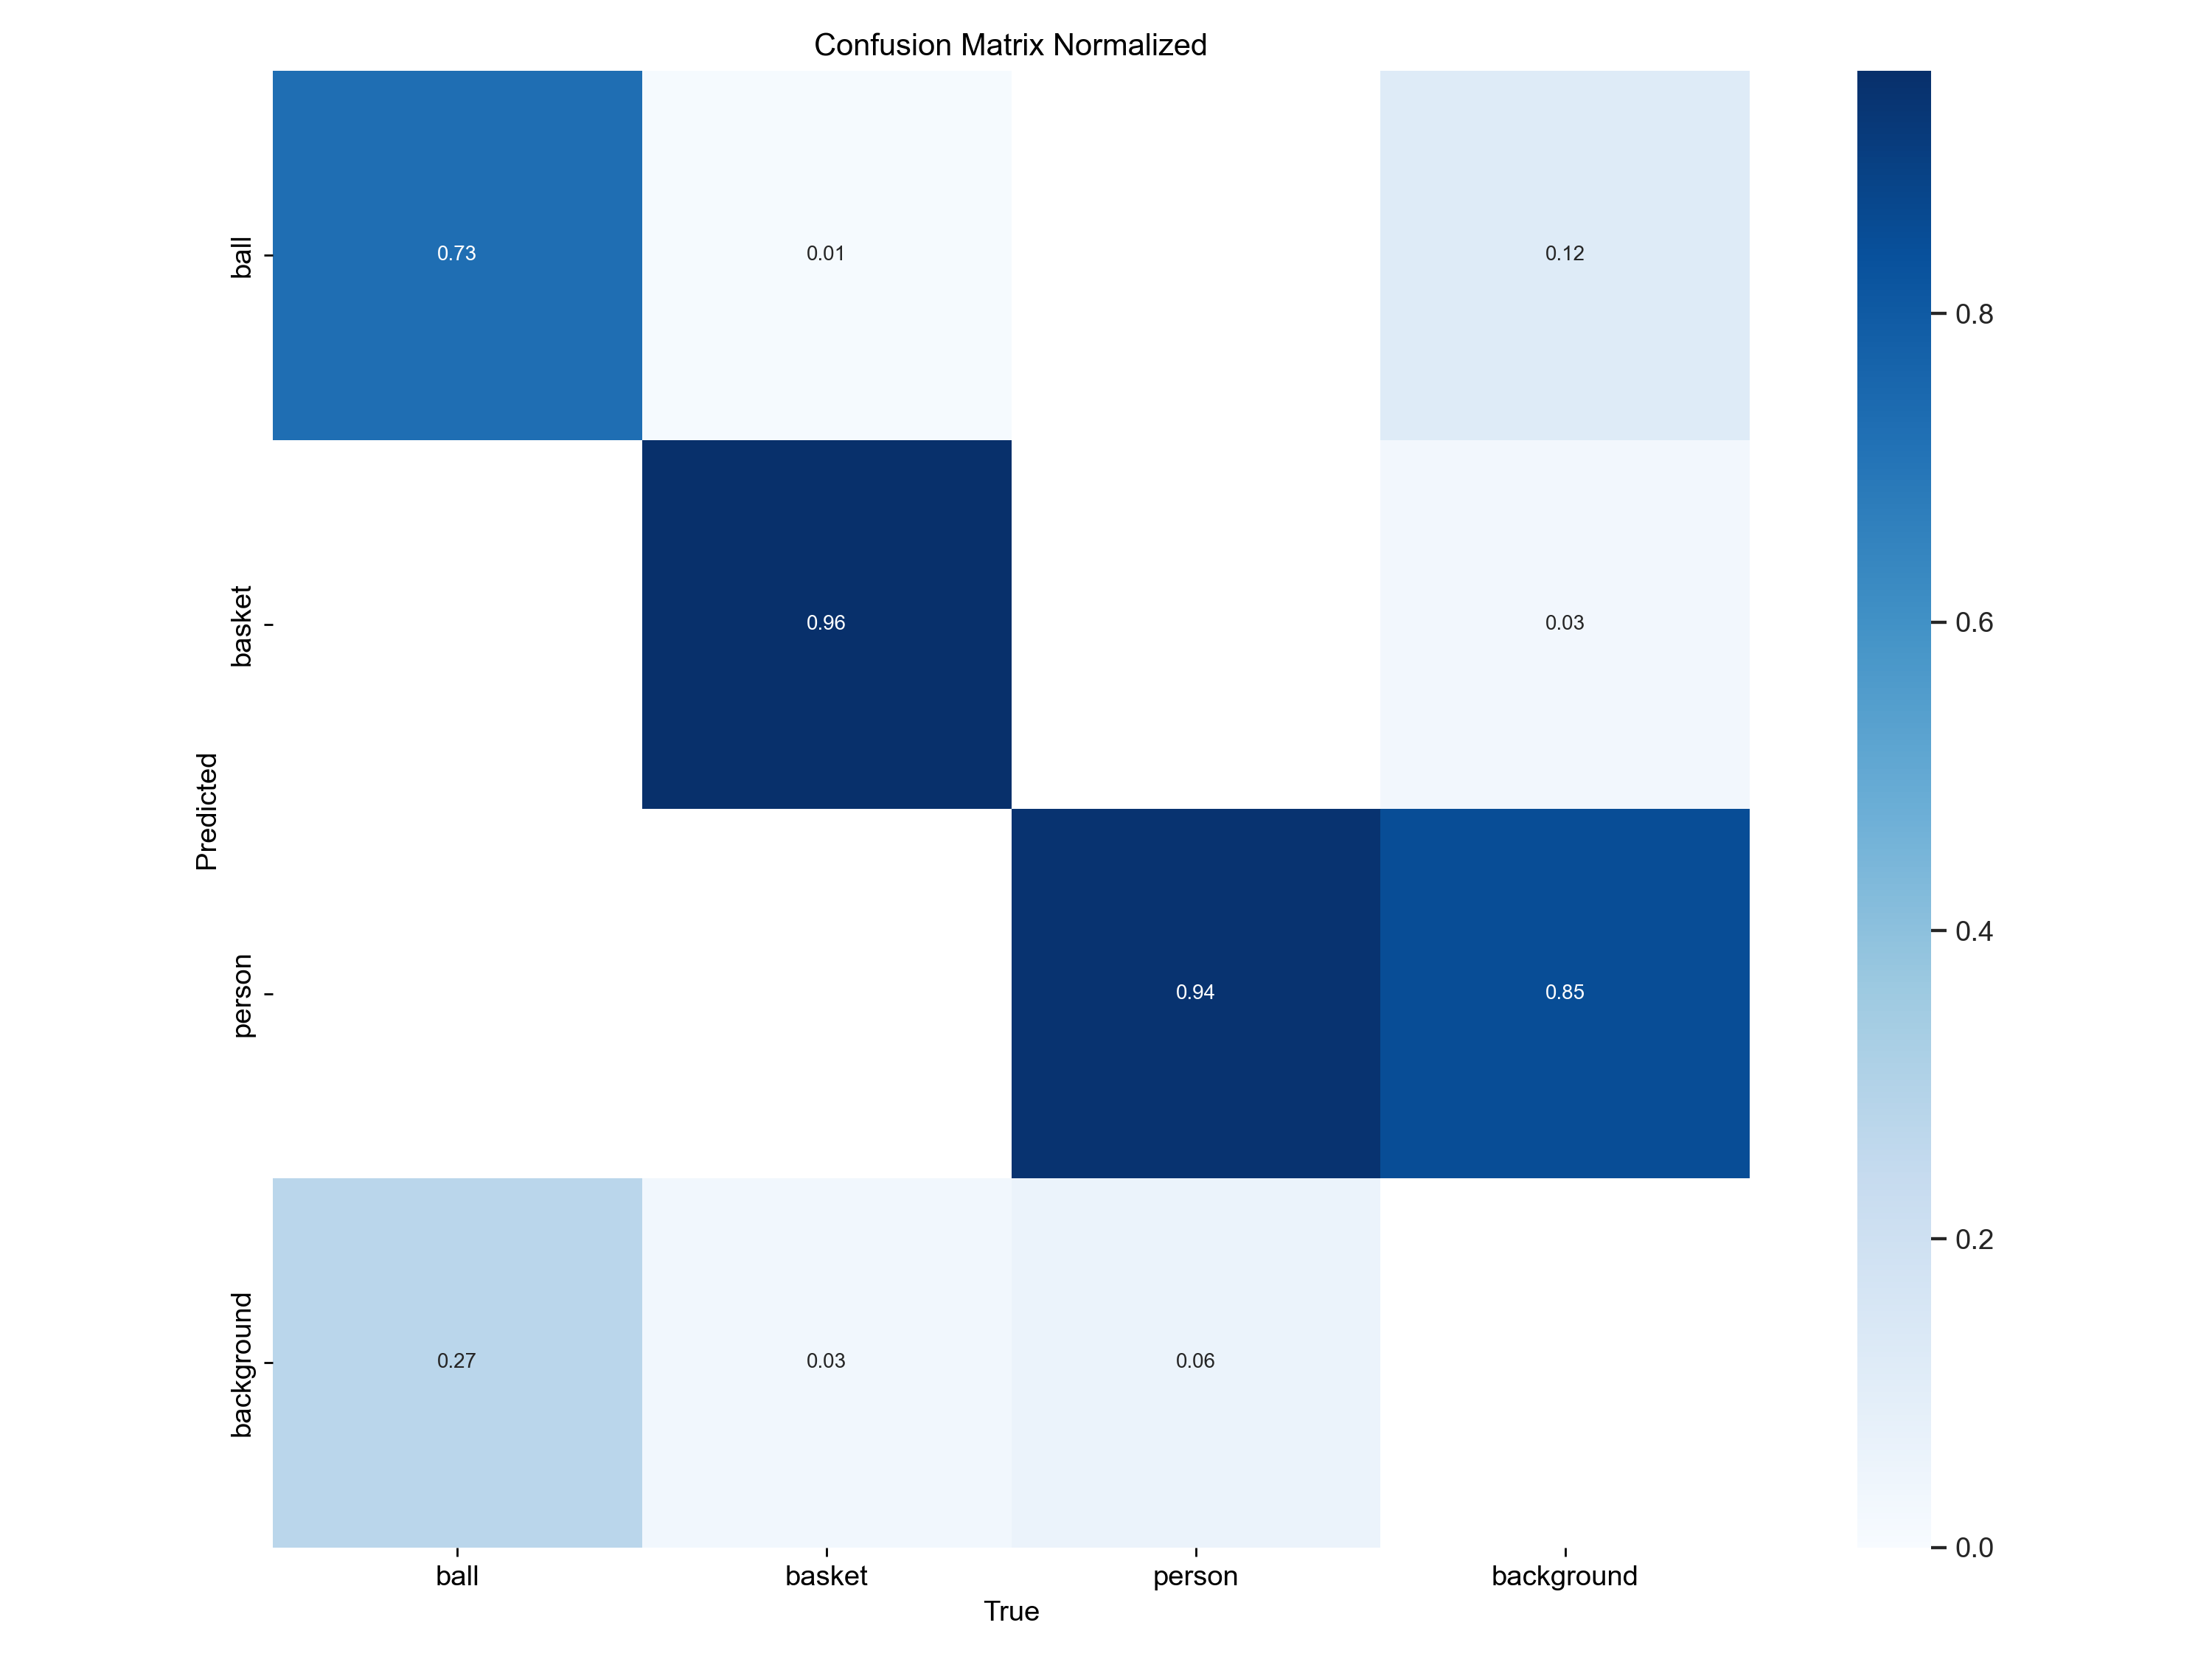

In [4]:
Image("runs/detect/train7/confusion_matrix_normalized.png", width=600)

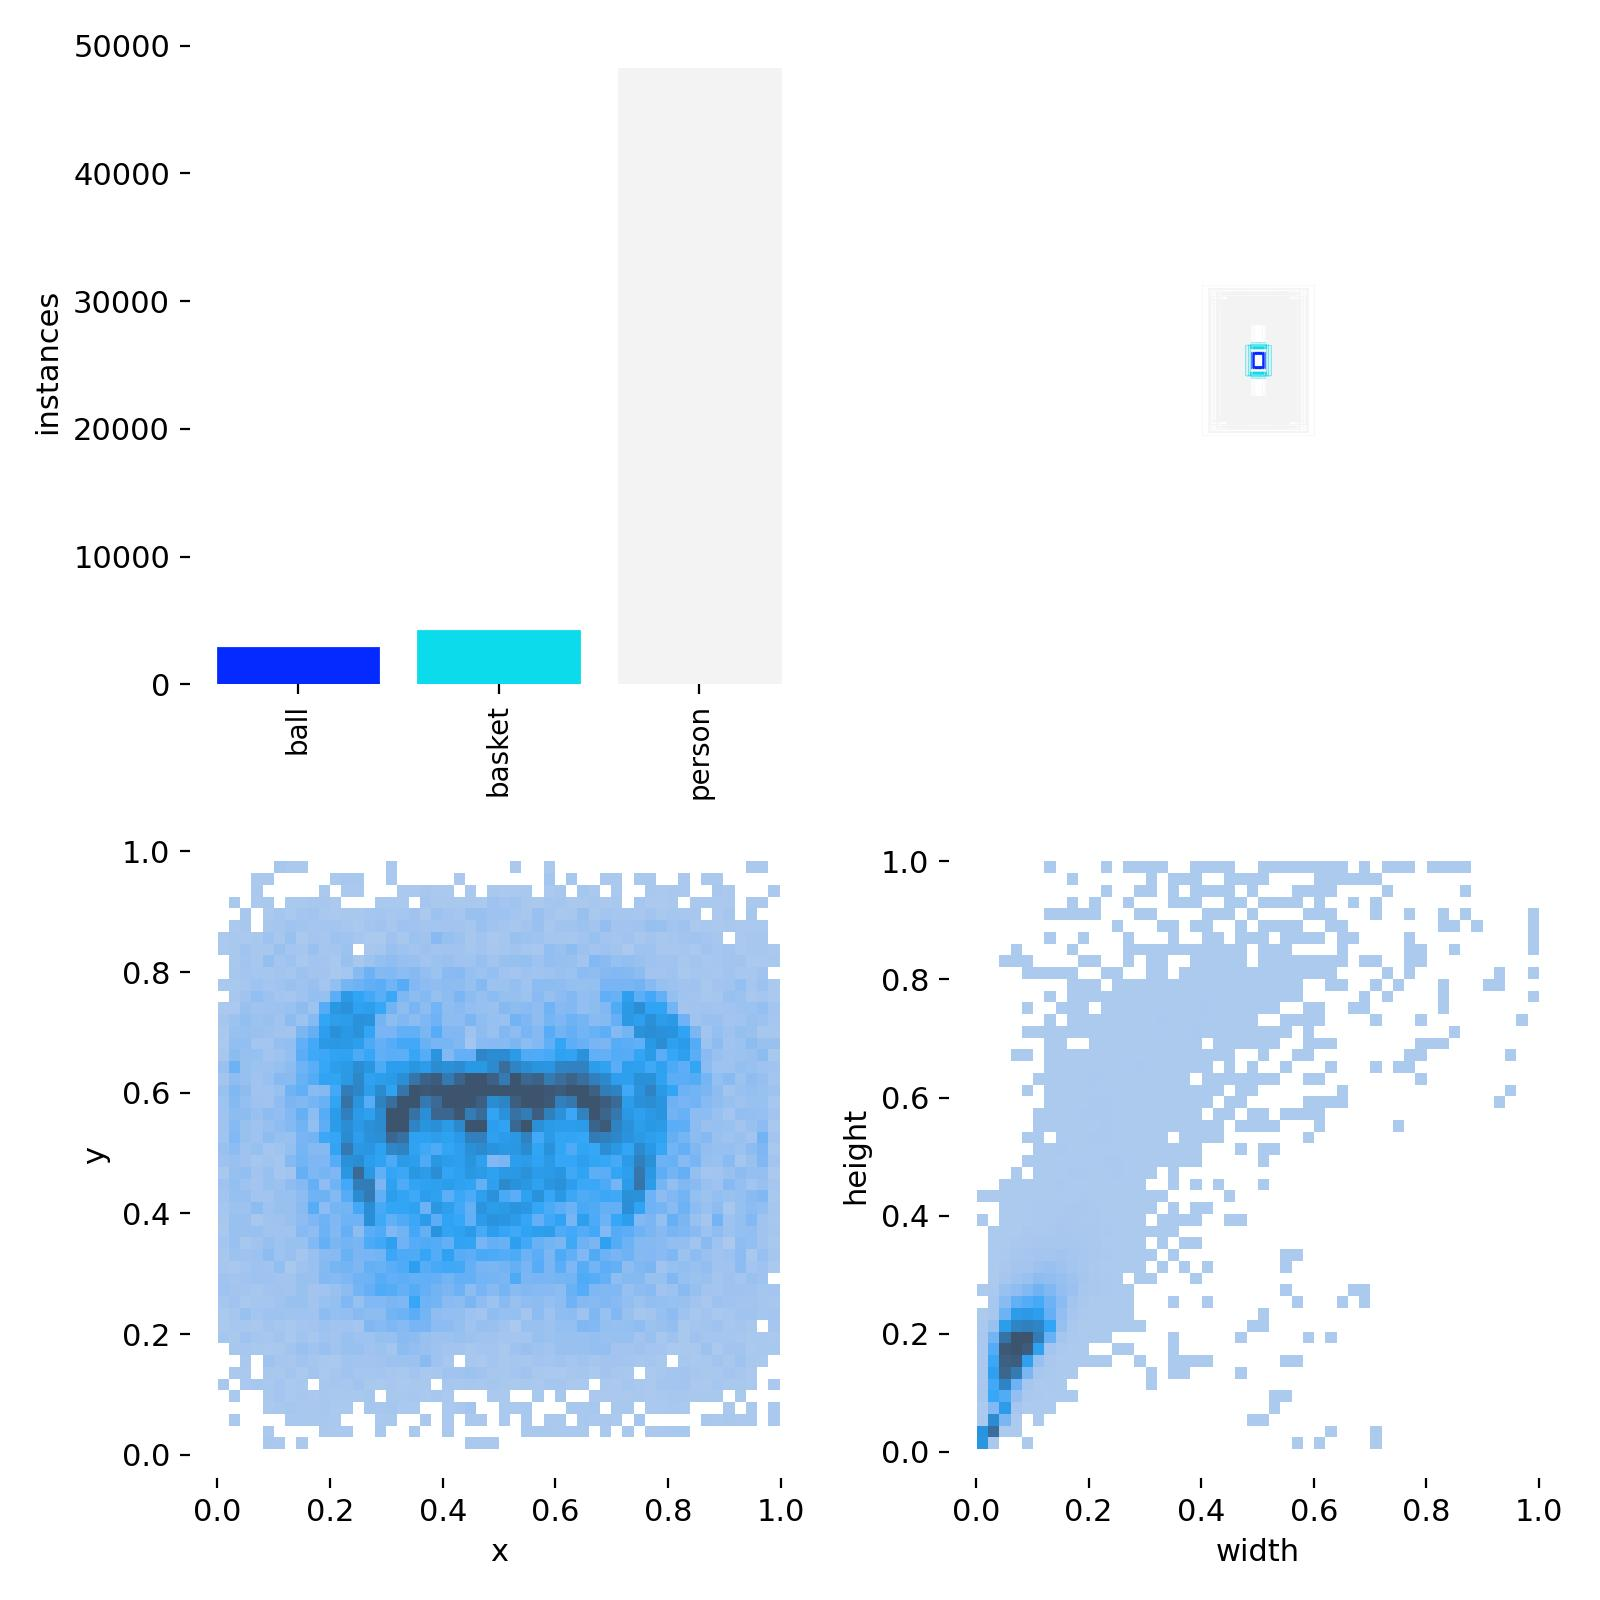

In [5]:
Image("runs/detect/train7/labels.jpg", width=600)

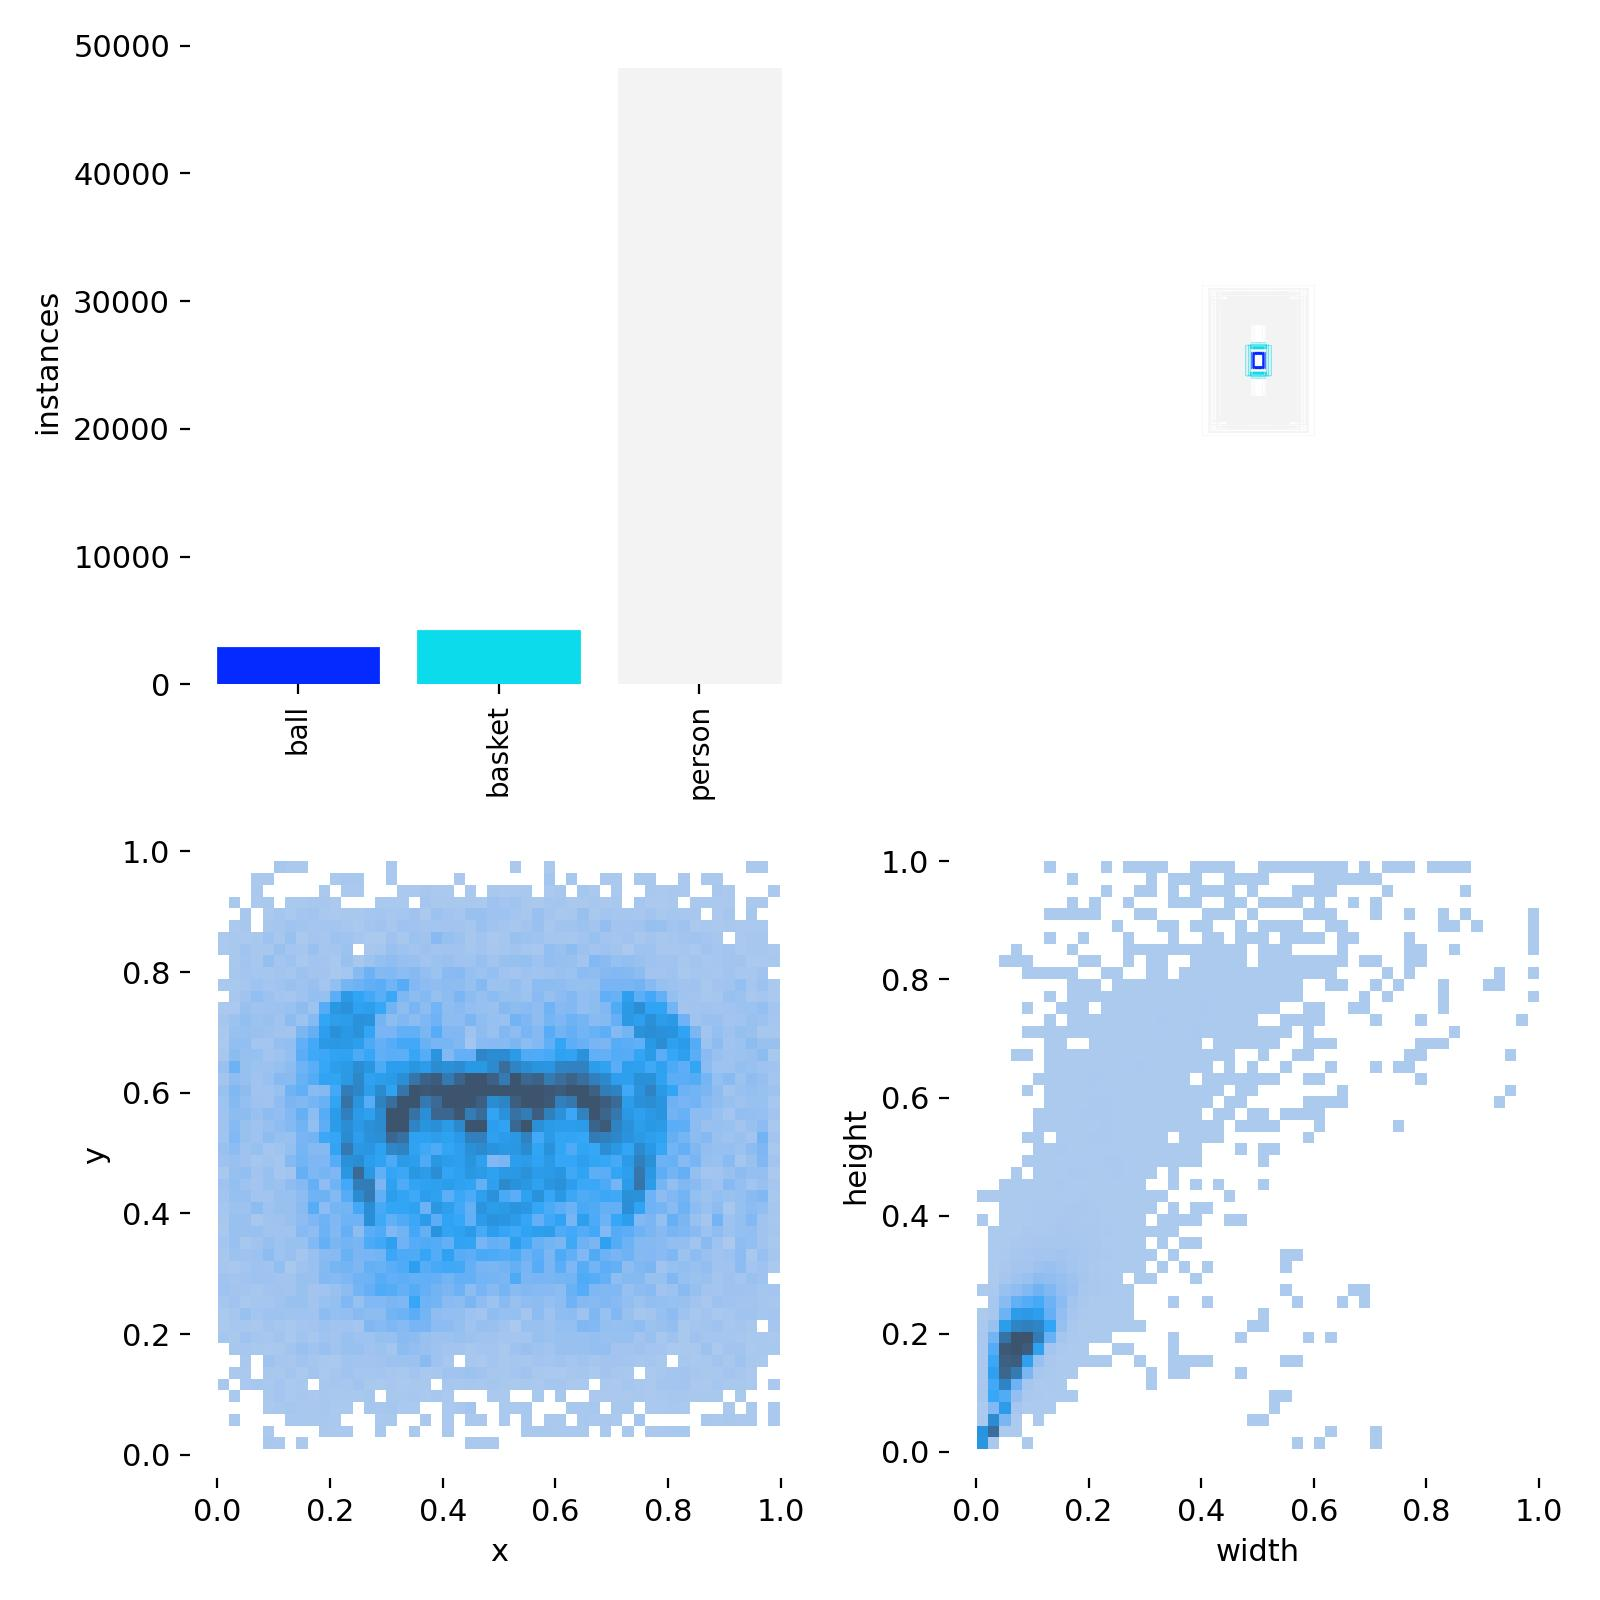

In [6]:
Image("runs/detect/train7/labels.jpg", width=600)

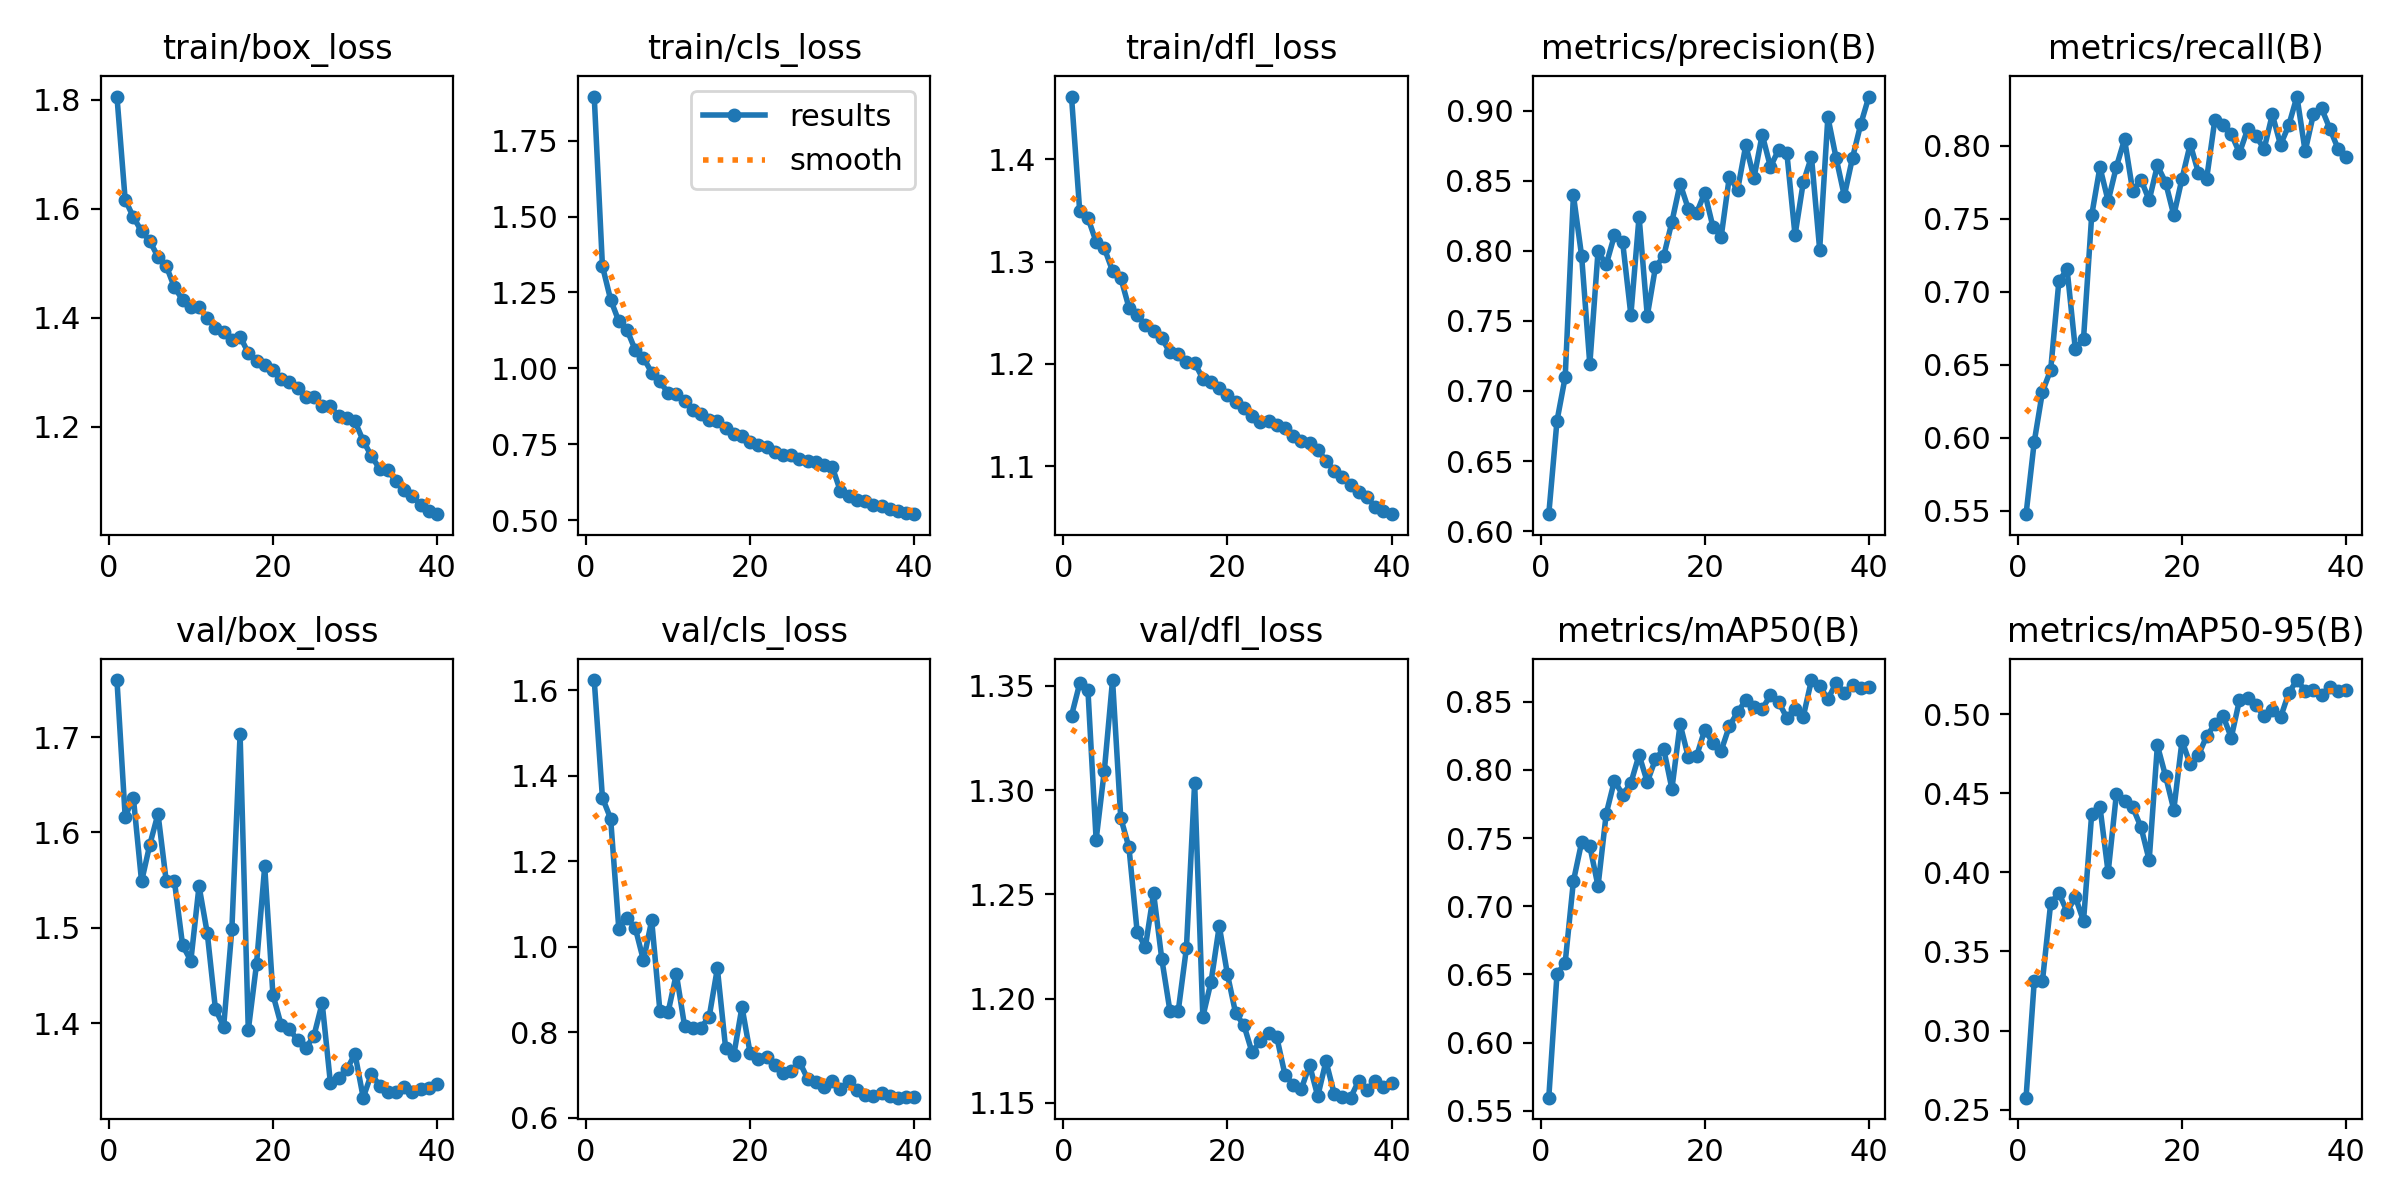

In [7]:
Image("runs/detect/train7/results.png", width=600)

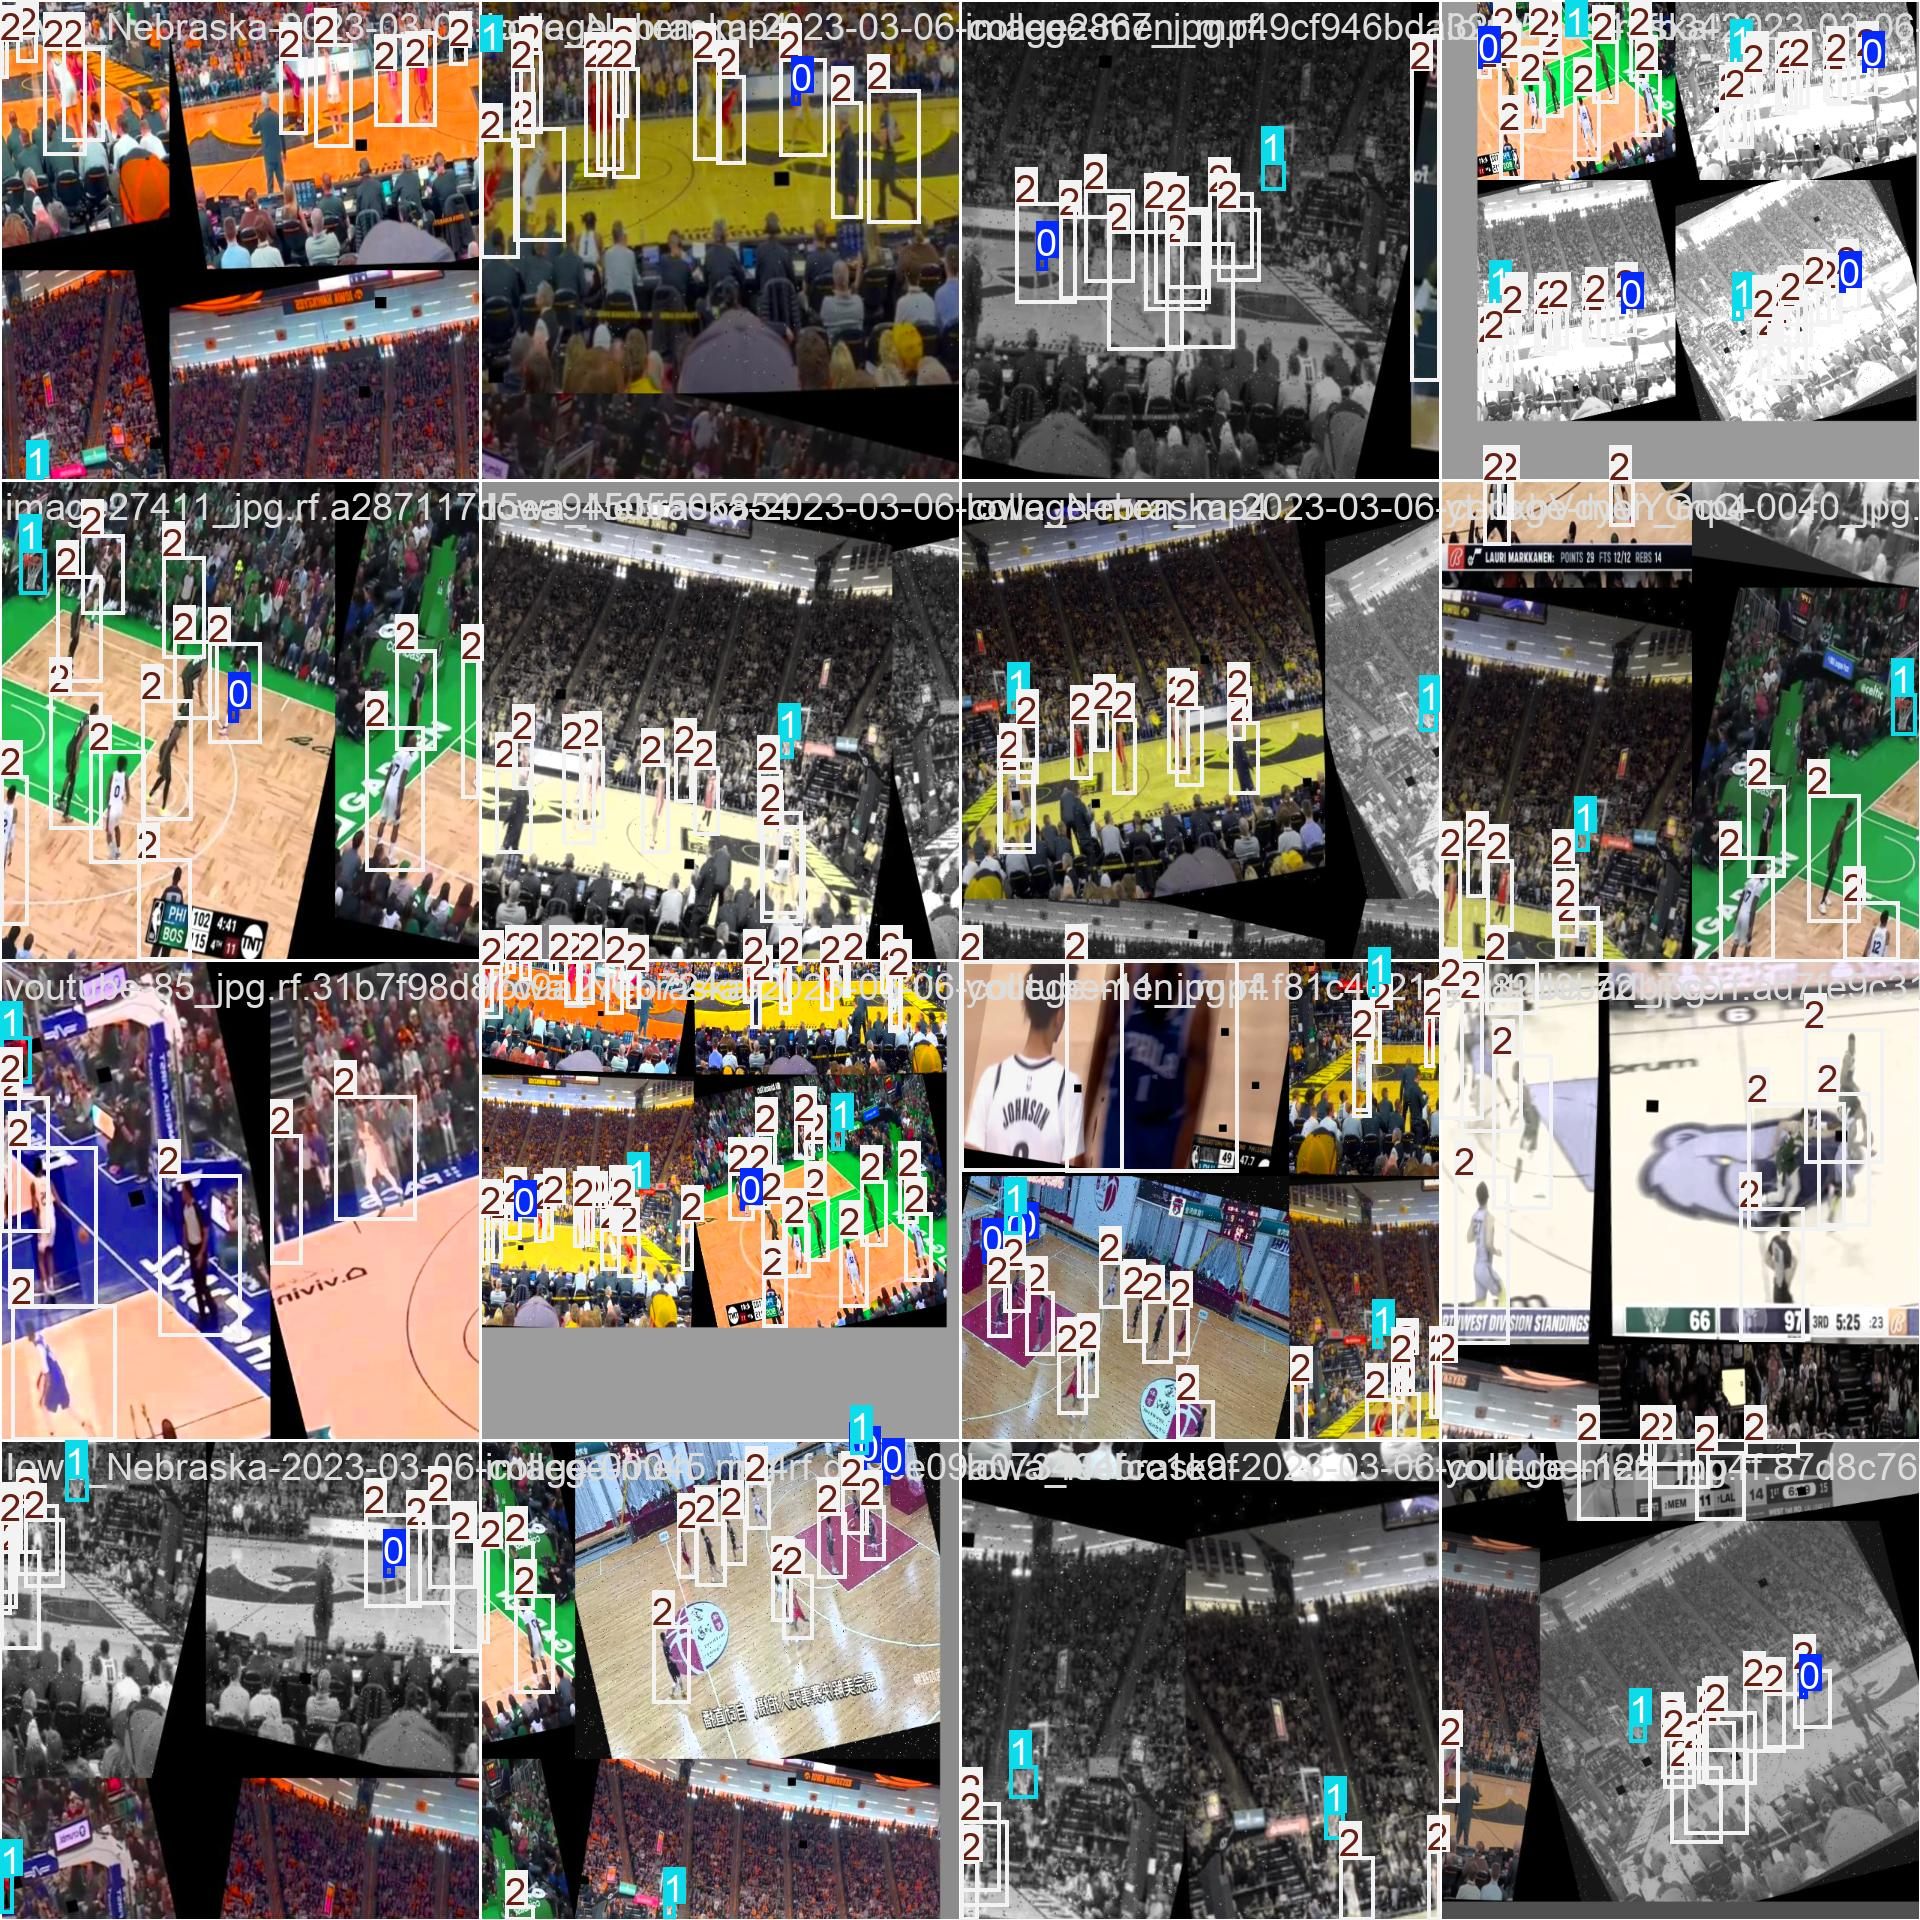

In [8]:
Image("runs/detect/train7/train_batch0.jpg", width=600)

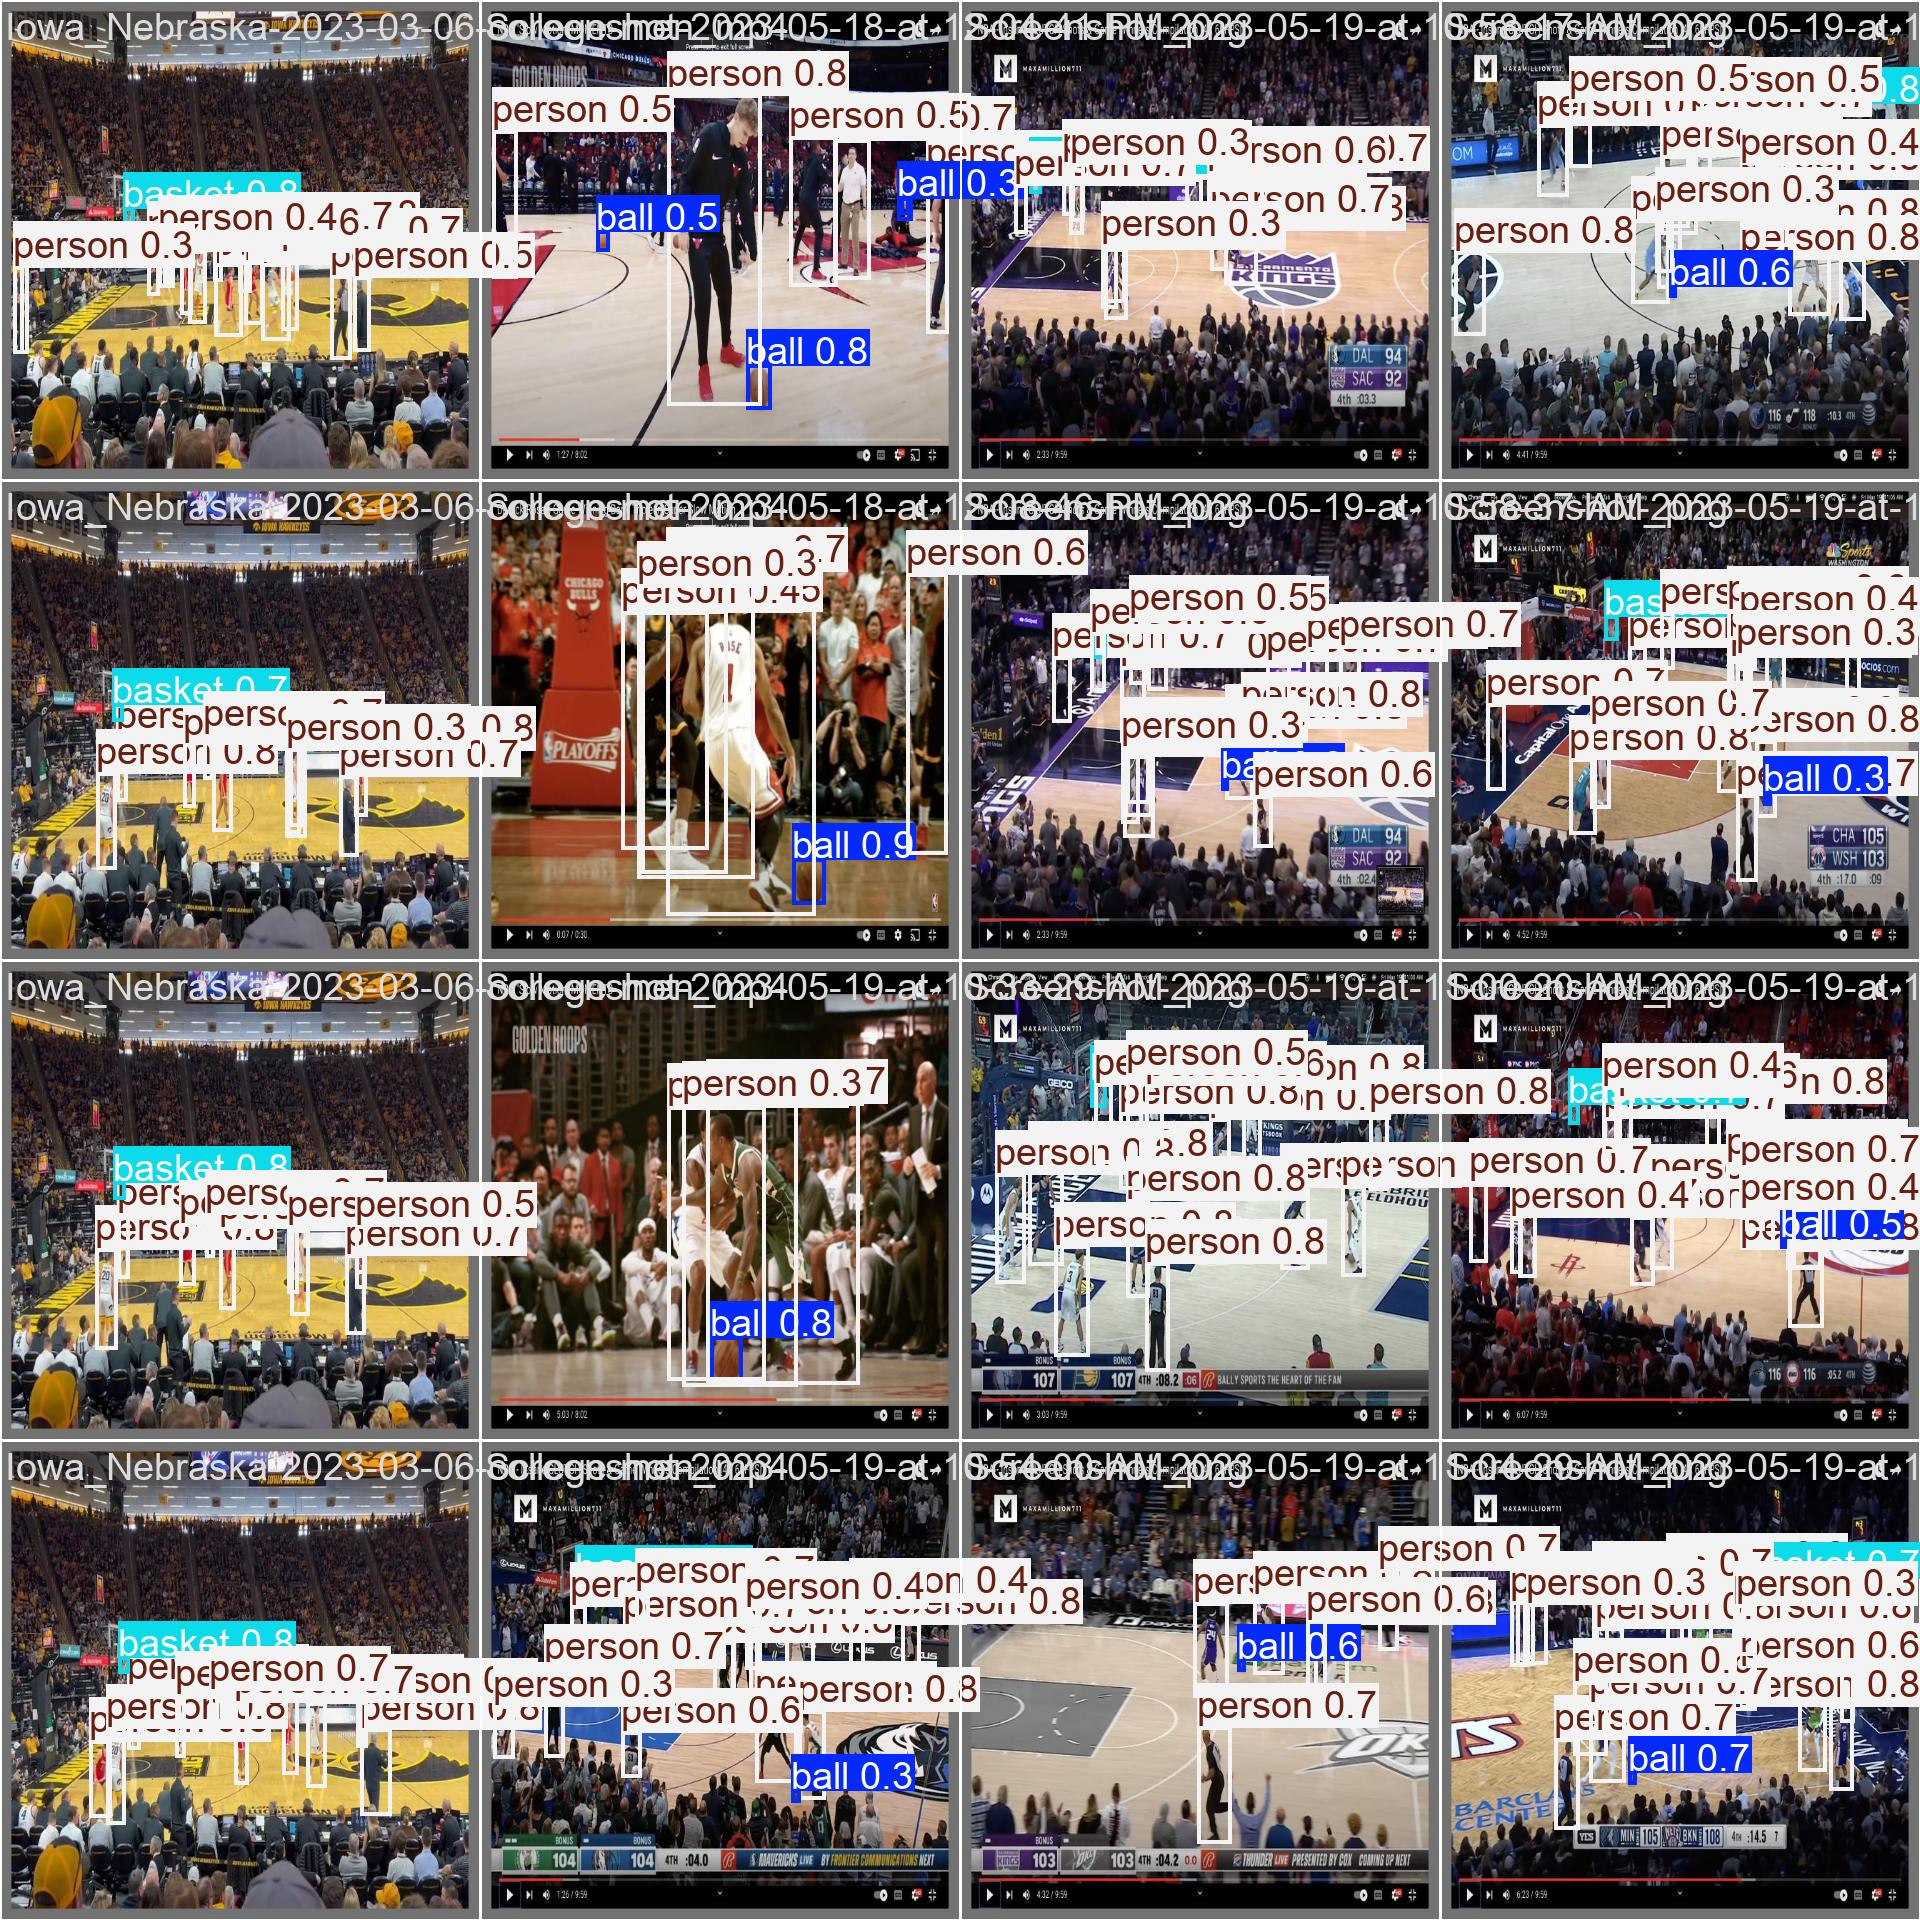

In [9]:
Image("runs/detect/train7/val_batch0_pred.jpg", width=600)

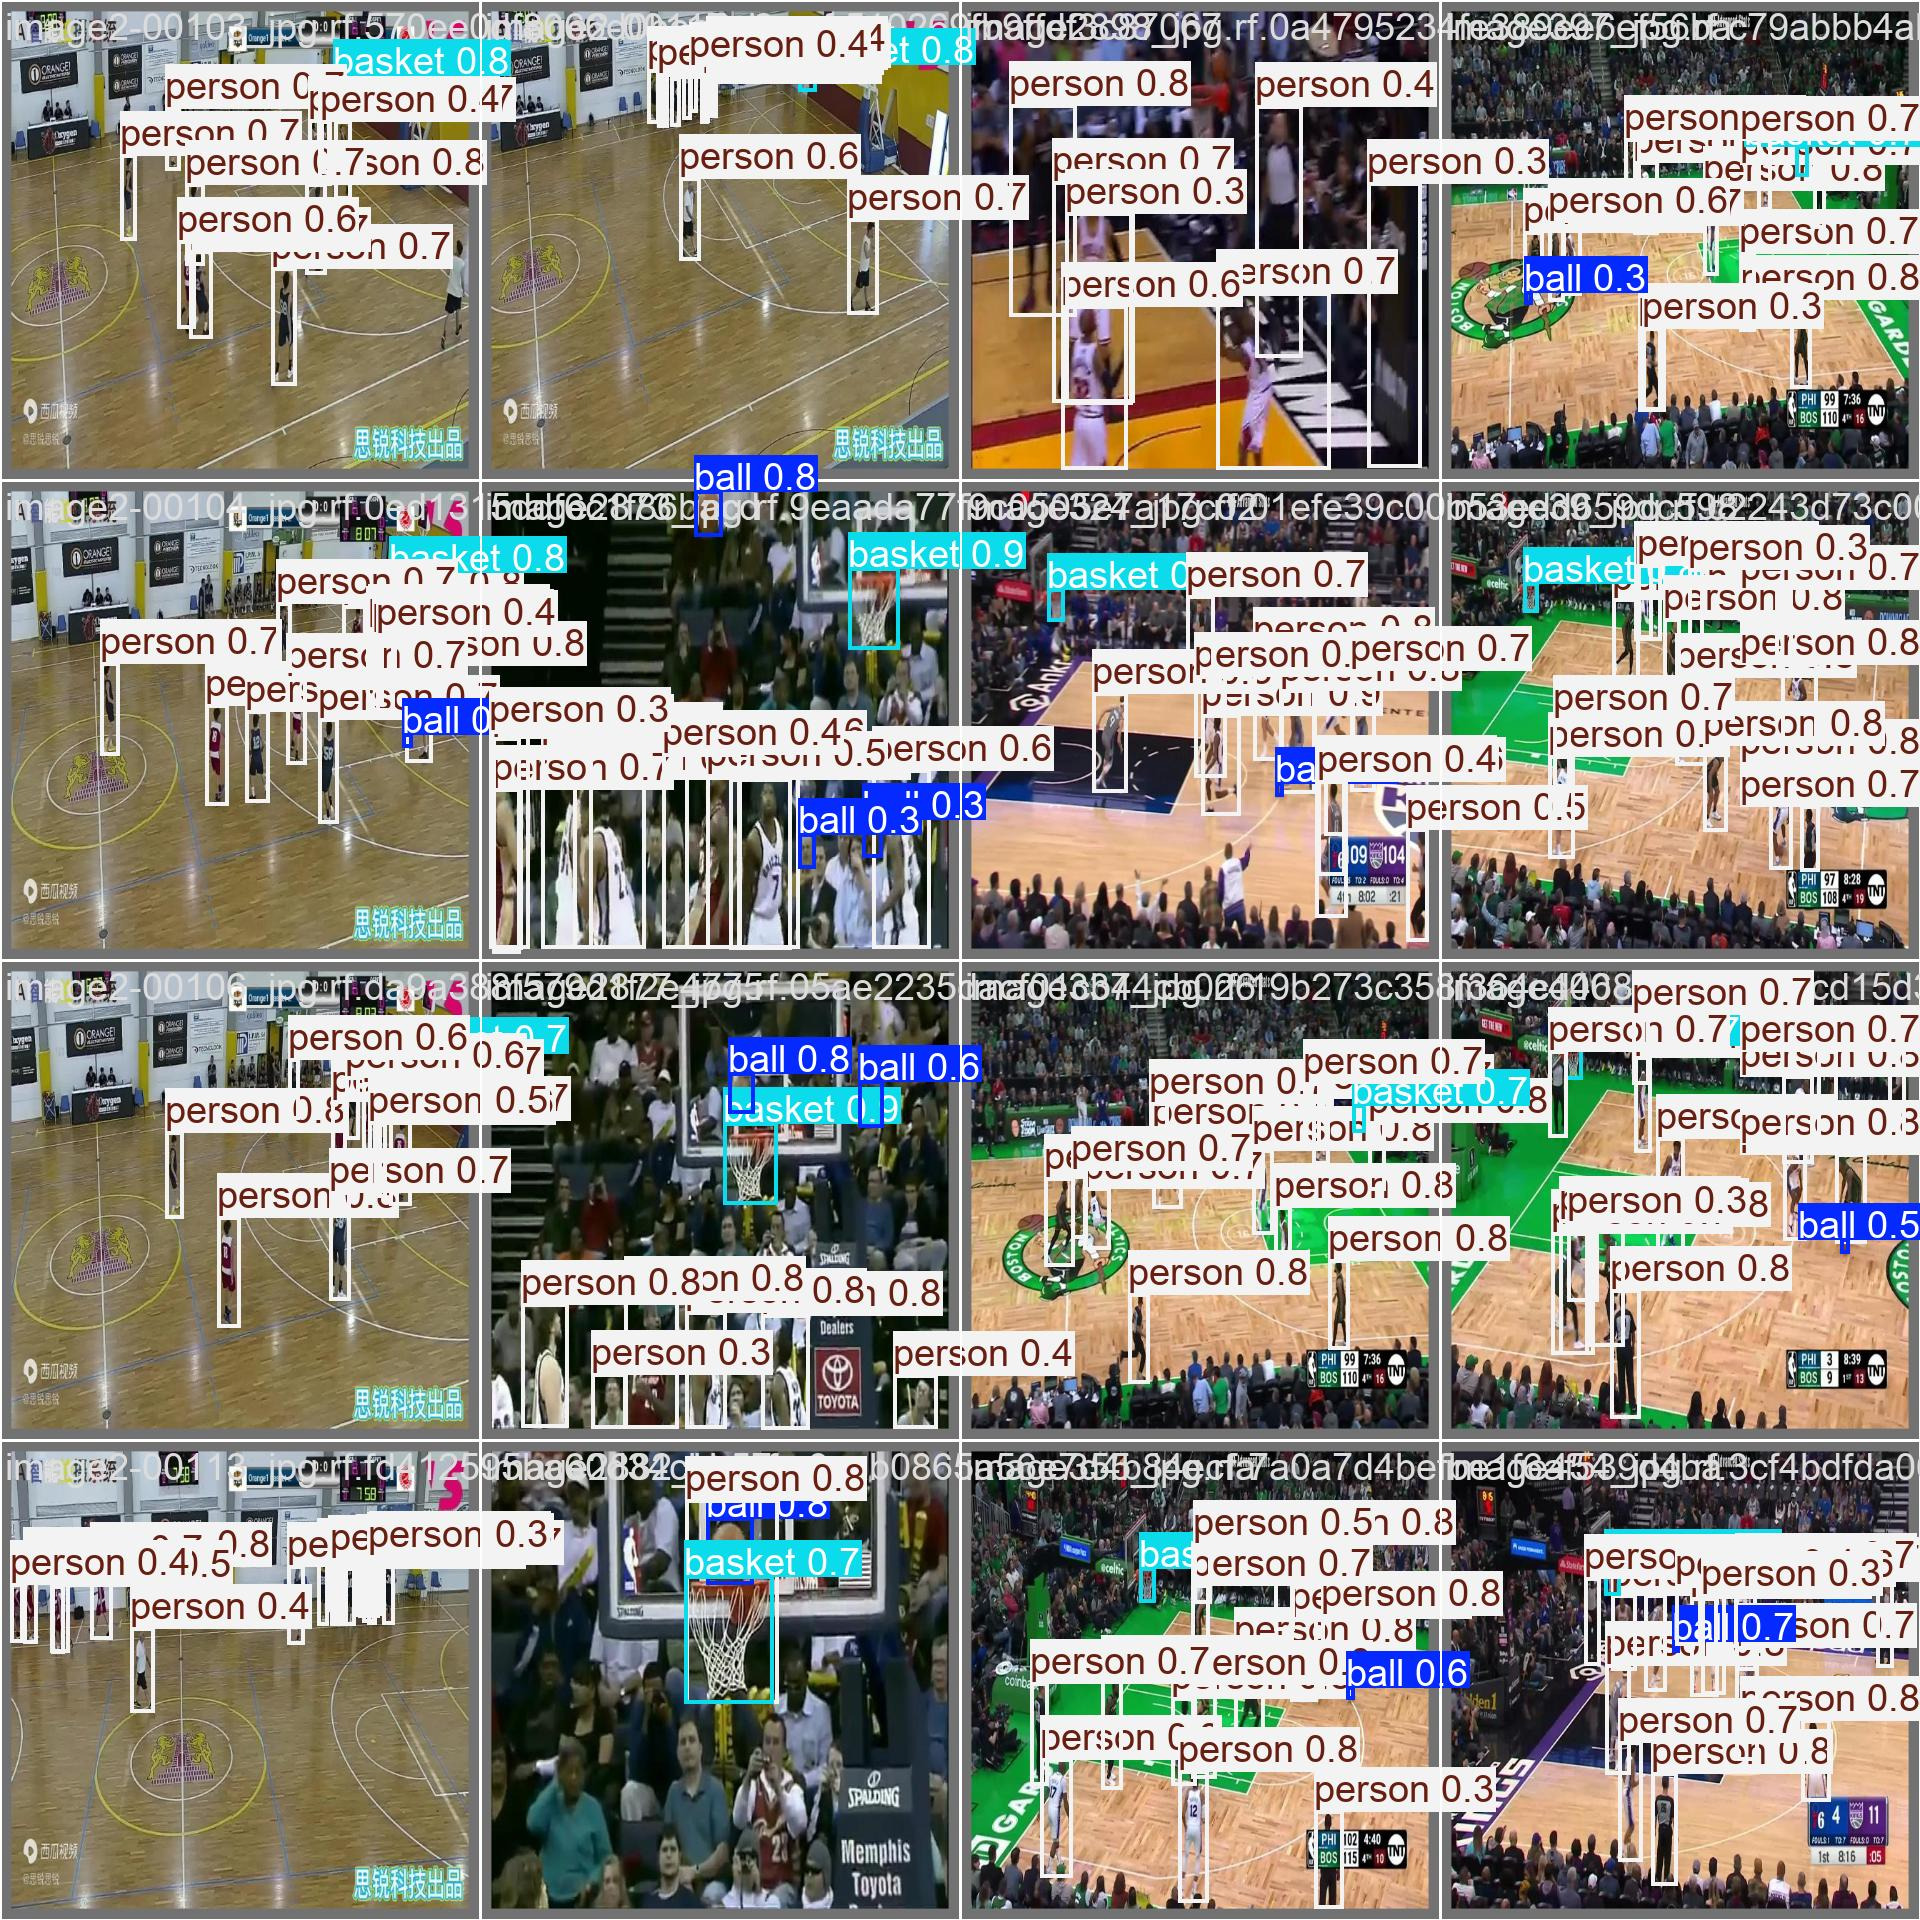

In [10]:
Image("runs/detect/train7/val_batch1_pred.jpg", width=600)

In [11]:

from ultralytics import YOLO

# Load the pre-trained model (or your custom model)
model = YOLO("runs/detect/train7/weights/best.pt")  # Adjust the path to your best model

# Perform prediction on the given image
results = model.predict(source="runs/detect/2.png", save=True, device='cpu')




image 1/1 c:\Users\MSI\YoloTrain\runs\detect\2.png: 320x640 1 basket, 9 persons, 102.7ms
Speed: 3.3ms preprocess, 102.7ms inference, 10.6ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs\detect\predict5


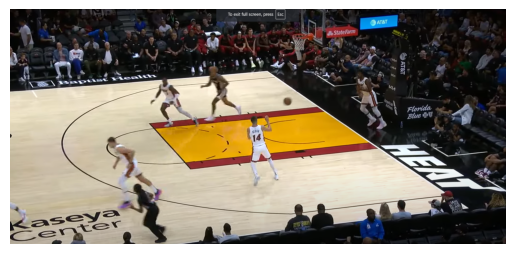

In [12]:
import matplotlib.pyplot as plt
import cv2

# Load the predicted image
image_path = 'runs/detect/2.png'  # replace with your predicted image path
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV default) to RGB for proper color display

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks
plt.show()


In [13]:
import os
from ultralytics import YOLO
import cv2

# Load the pre-trained model (or your custom model)
model = YOLO("runs/detect/train7/weights/best.pt")  # Adjust the path to your model

# Open the video file
video_path = 'C:/Users/MSI/YoloTrain/zz.mp4'  # Replace with your video path
cap = cv2.VideoCapture(video_path)

# Create a folder to save frames
output_folder = "runs/detect/predicted_frames"
os.makedirs(output_folder, exist_ok=True)

frame_count = 0

# Check if video opened successfully
if not cap.isOpened():
    print("Error opening video file")
else:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Perform YOLO prediction on the current frame
        results = model.predict(source=frame, device='cpu', save=False, show=False)

        # Get the predictions (bounding boxes, confidence, labels, etc.)
        boxes = results[0].boxes  # Extract the bounding boxes
        
        # Iterate through the boxes and filter based on confidence score (> 0.5)
        for box in boxes:
            confidence = box.conf[0]  # Confidence score
            if confidence > 0.5:  # Only display predictions above 0.5 confidence
                x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Convert coordinates to integers
                class_id = int(box.cls[0])  # Class ID
                label = model.names[class_id]  # Class name from model

                # Draw the bounding box and label
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                text = f"{label} ({confidence:.2f})"
                cv2.putText(frame, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Save the frame with predictions
        frame_filename = f"{output_folder}/frame_{frame_count:04d}.png"
        cv2.imwrite(frame_filename, frame)
        print(f"Saved: {frame_filename}")

        frame_count += 1

    # Release the video capture object
    cap.release()
    print("Processing complete. All frames saved.")



0: 384x640 12 persons, 65.3ms
Speed: 0.0ms preprocess, 65.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
Saved: runs/detect/predicted_frames/frame_0000.png

0: 384x640 12 persons, 42.2ms
Speed: 4.1ms preprocess, 42.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Saved: runs/detect/predicted_frames/frame_0001.png

0: 384x640 13 persons, 52.4ms
Speed: 1.0ms preprocess, 52.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Saved: runs/detect/predicted_frames/frame_0002.png

0: 384x640 13 persons, 51.5ms
Speed: 1.7ms preprocess, 51.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Saved: runs/detect/predicted_frames/frame_0003.png

0: 384x640 13 persons, 54.1ms
Speed: 0.7ms preprocess, 54.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Saved: runs/detect/predicted_frames/frame_0004.png

0: 384x640 14 persons, 39.5ms
Speed: 0.0ms preprocess, 39.5ms inference, 0.0ms postprocess per image at 

: 